In [1]:
# importing libraries
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import RobustScaler , MinMaxScaler , StandardScaler , LabelEncoder
#from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

In [2]:
# This function takes the numerical column as the input and returns the boxplots and histogram 
def histogram_boxplot(feature, figsize=(10,5)):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(x=feature, ax=ax_box2,  color='c') # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='r', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

# 1. The raw data files and their format

In [3]:
DF1_test = pd.read_csv('miles-driven.csv')
DF2_test = pd.read_csv('road-accidents.csv')

In [4]:
DF1_test.head()

,state|million_miles_annually
0,Alabama|64914
1,Alaska|4593
2,Arizona|59575
3,Arkansas|32953
4,California|320784


# obvious that the separator of data is '|' not ','

In [5]:
DF1_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 1 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   state|million_miles_annually  51 non-null     object
dtypes: object(1)
memory usage: 536.0+ bytes


In [6]:
DF2_test.head(10)

,##### LICENSE #####
0,# This data set is modified from the original ...
1,# and it is released under CC BY 4.0 (https://...
2,##### COLUMN ABBREVIATIONS #####
3,# drvr_fatl_col_bmiles = Number of drivers inv...
4,# perc_fatl_speed = Percentage Of Drivers Invo...
5,# perc_fatl_alcohol = Percentage Of Drivers In...
6,# perc_fatl_1st_time = Percentage Of Drivers I...
7,##### DATA BEGIN #####
8,state|drvr_fatl_col_bmiles|perc_fatl_speed|per...
9,Alabama|18.8|39|30|80


# obvious that the separator of data is '|' not ',' here too

In [7]:
DF2_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ##### LICENSE #####  60 non-null     object
dtypes: object(1)
memory usage: 608.0+ bytes


# 1. Read in and get an overview of the data

In [8]:
'''
DF1 = pd.read_csv('/content/miles-driven.csv',sep='|',index_col='state')
DF2 = pd.read_csv('/content/road-accidents.csv',header=9,sep='|',index_col='state')
'''

"\nDF1 = pd.read_csv('/content/miles-driven.csv',sep='|',index_col='state')\nDF2 = pd.read_csv('/content/road-accidents.csv',header=9,sep='|',index_col='state')\n"

In [9]:
DF1 = pd.read_csv('miles-driven.csv',sep='|')
DF2 = pd.read_csv('road-accidents.csv',header=9,sep='|')

In [10]:
DF1.head()

,state,million_miles_annually
0,Alabama,64914
1,Alaska,4593
2,Arizona,59575
3,Arkansas,32953
4,California,320784


In [11]:
DF1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   state                   51 non-null     object
 1   million_miles_annually  51 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 944.0+ bytes


In [12]:
DF2.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89


# coulmns names
1. Number of drivers involved in fatal collisions per billion miles
2. Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding
3. Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired
4. Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents

In [13]:
DF2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 51 non-null     object 
 1   drvr_fatl_col_bmiles  51 non-null     float64
 2   perc_fatl_speed       51 non-null     int64  
 3   perc_fatl_alcohol     51 non-null     int64  
 4   perc_fatl_1st_time    51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


# 2. Create a textual and a graphical summary of the data

In [14]:
DF1.describe()

,million_miles_annually
count,51.000000
mean,57851.019608
std,59898.414088
min,3568.000000
25%,17450.000000
50%,46606.000000
75%,71922.500000
max,320784.000000


In [15]:
DF2.describe()

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
count,51.000000,51.000000,51.000000,51.00000
mean,15.790196,31.725490,30.686275,88.72549
std,4.122002,9.633438,5.132213,6.96011
min,5.900000,13.000000,16.000000,76.00000
25%,12.750000,23.000000,28.000000,83.50000
50%,15.600000,34.000000,30.000000,88.00000
75%,18.500000,38.000000,33.000000,95.00000
max,23.900000,54.000000,44.000000,100.00000


# Append the first dataset in the second data set

In [16]:
DF2['million_miles_annually']=DF1.million_miles_annually

In [17]:
DF2.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,million_miles_annually
0,Alabama,18.8,39,30,80,64914
1,Alaska,18.1,41,25,94,4593
2,Arizona,18.6,35,28,96,59575
3,Arkansas,22.4,18,26,95,32953
4,California,12.0,35,28,89,320784


In [18]:
DF2.describe()

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,million_miles_annually
count,51.000000,51.000000,51.000000,51.00000,51.000000
mean,15.790196,31.725490,30.686275,88.72549,57851.019608
std,4.122002,9.633438,5.132213,6.96011,59898.414088
min,5.900000,13.000000,16.000000,76.00000,3568.000000
25%,12.750000,23.000000,28.000000,83.50000,17450.000000
50%,15.600000,34.000000,30.000000,88.00000,46606.000000
75%,18.500000,38.000000,33.000000,95.00000,71922.500000
max,23.900000,54.000000,44.000000,100.00000,320784.000000


# creat report with graphical summary of the data

In [19]:
pp.ProfileReport(DF2)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

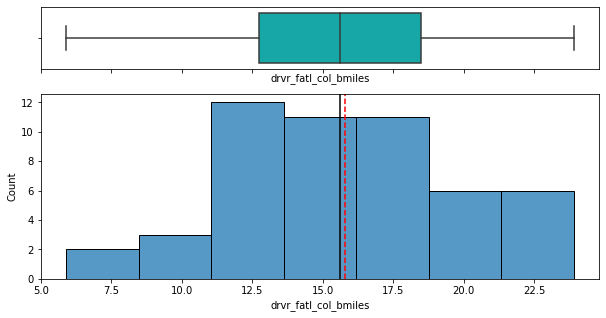

In [20]:
histogram_boxplot(DF2.drvr_fatl_col_bmiles)

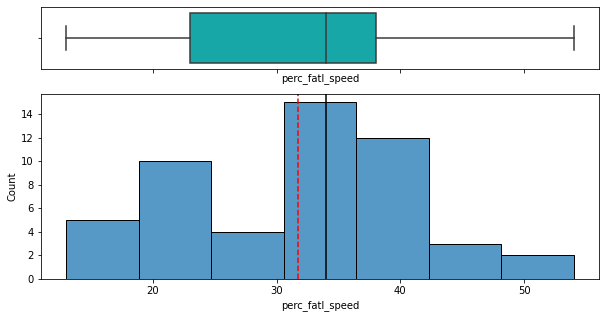

In [21]:
histogram_boxplot(DF2.perc_fatl_speed)

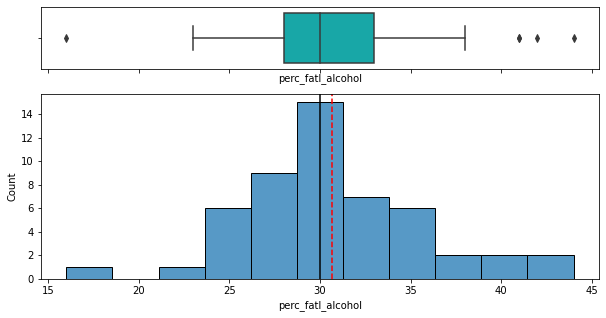

In [22]:
histogram_boxplot(DF2.perc_fatl_alcohol)

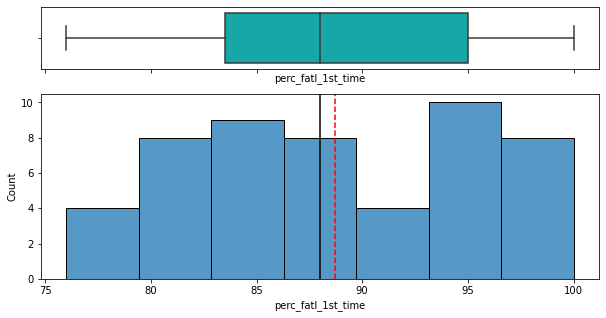

In [23]:
histogram_boxplot(DF2.perc_fatl_1st_time)

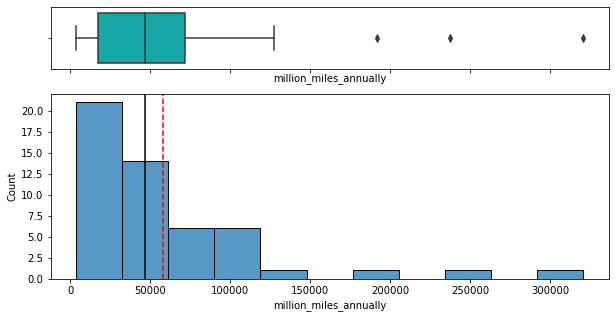

In [24]:
histogram_boxplot(DF2.million_miles_annually)

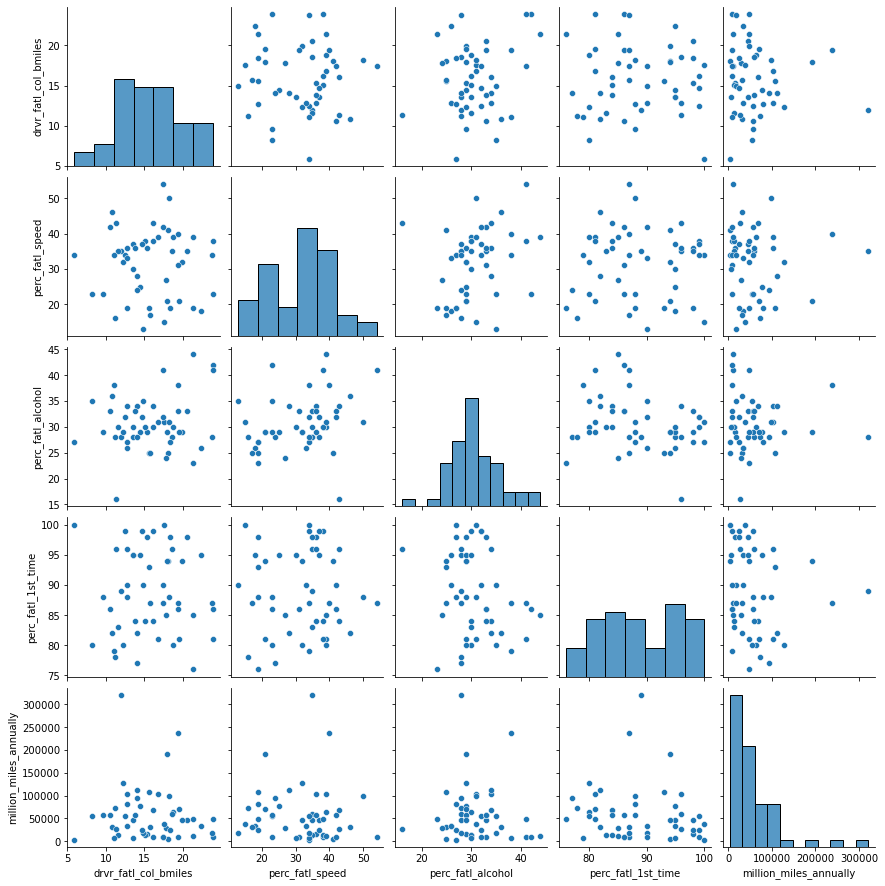

In [25]:
sns.pairplot(DF2)

# 4. Quantify the association of features and accidents

In [26]:
DF2.corr()

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,million_miles_annually
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,-0.017942,-0.077133
perc_fatl_speed,-0.029080,1.000000,0.286244,0.014066,-0.043199
perc_fatl_alcohol,0.199426,0.286244,1.000000,-0.245455,-0.034561
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,1.000000,-0.128928
million_miles_annually,-0.077133,-0.043199,-0.034561,-0.128928,1.000000


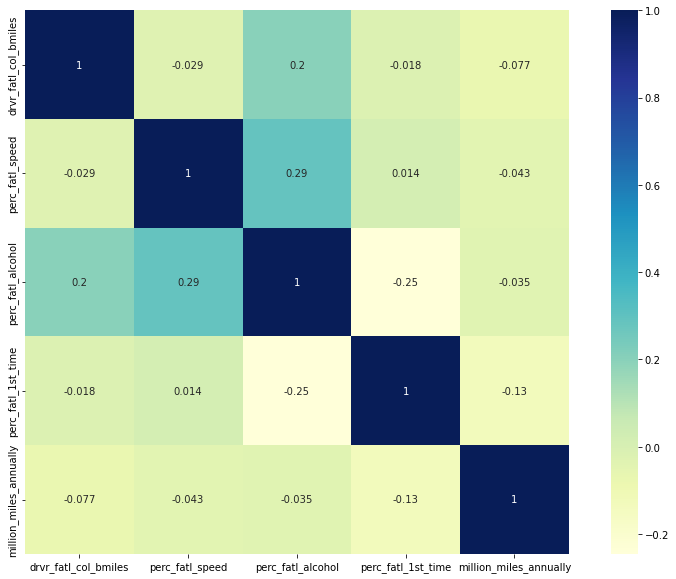

In [27]:
plt.figure(figsize=(15,10))
# plt.figure(figsize=(14, 14))
dat_cor = DF2.corr()
sns.heatmap(dat_cor, cmap = 'YlGnBu', annot=True, square=True);

In [28]:
# creating an instance of label encoder
labelencoder=LabelEncoder()

# assign numerical values and storing it in another column called class_encoder.
DF2['state_encode']=labelencoder.fit_transform(DF2['state'])

DF2.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,million_miles_annually,state_encode
0,Alabama,18.8,39,30,80,64914,0
1,Alaska,18.1,41,25,94,4593,1
2,Arizona,18.6,35,28,96,59575,2
3,Arkansas,22.4,18,26,95,32953,3
4,California,12.0,35,28,89,320784,4


In [29]:
Data_state=DF2['state'].copy()
Data_state.head()

0       Alabama
1        Alaska
2       Arizona
3      Arkansas
4    California
Name: state, dtype: object

In [30]:
DF2.drop(['state'],inplace=True, axis=1)
DF2.head()

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,million_miles_annually,state_encode
0,18.8,39,30,80,64914,0
1,18.1,41,25,94,4593,1
2,18.6,35,28,96,59575,2
3,22.4,18,26,95,32953,3
4,12.0,35,28,89,320784,4


In [31]:
DF2

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,million_miles_annually,state_encode
0,18.8,39,30,80,64914,0
1,18.1,41,25,94,4593,1
2,18.6,35,28,96,59575,2
3,22.4,18,26,95,32953,3
4,12.0,35,28,89,320784,4
5,13.6,37,28,95,46606,5
6,10.8,46,36,82,31197,6
7,16.2,38,30,99,9028,7
8,5.9,34,27,100,3568,8
9,17.9,21,29,94,191855,9


# 5. Fit a multivariate linear regression


In [33]:
# Create the features and target DataFrames
features = DF2[['perc_fatl_speed', 'perc_fatl_alcohol', 'perc_fatl_1st_time']]
target = DF2['drvr_fatl_col_bmiles']

# Create a linear regression object
reg = LinearRegression()


reg.fit(features, target)

# Retrieve the regression coefficients
fit_coef = reg.coef_
fit_coef

array([-0.04180041,  0.19086404,  0.02473301])

# 6. Perform PCA on standardized data

The cumulative variance of the first two principal components is 2.43178


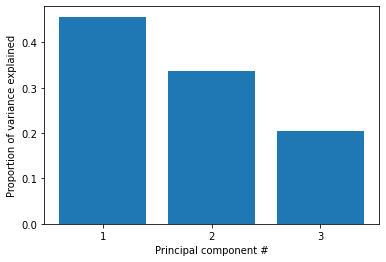

In [34]:
# Standardize and center the feature columns
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

pca = PCA()
pca.fit(features_scaled)

# Plot the proportion of variance explained on the y-axis of the bar plot
plt.bar(range(1, pca.n_components_ + 1),  pca.explained_variance_ratio_)
plt.xlabel('Principal component #')
plt.ylabel('Proportion of variance explained')
plt.xticks([1, 2, 3])

# Compute the cumulative proportion of variance explained by the first two principal components
two_first_comp_var_exp = pca.explained_variance_.cumsum()[1]
print("The cumulative variance of the first two principal components is {}".format(round(two_first_comp_var_exp, 5)))

# 7. Visualize the first two principal components

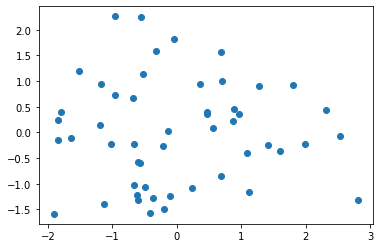

In [35]:
p_comps = pca.fit_transform(features_scaled)

# Extract the first and second component to use for the scatter plot
p_comp1 = p_comps[:, 0]
p_comp2 = p_comps[:, 1]

# Plot the first two principal components in a scatter plot
plt.scatter(p_comp1, p_comp2)

# 8. Find clusters of similar states in the data

C:\Users\BluRay\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


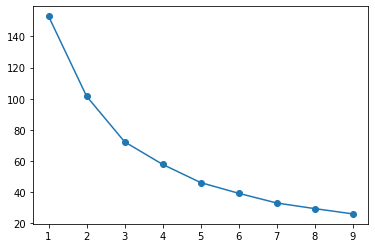

In [36]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Initialize the KMeans object using the current number of clusters (k)
    km = KMeans(n_clusters=k, random_state=8)
    # Fit the scaled features to the KMeans object
    km.fit(features_scaled)
    # Append the inertia for `km` to the list of inertias
    inertias.append(km.inertia_)

# Plot the results in a line plot
plt.plot(ks, inertias, marker='o')

# 9. KMeans to visualize clusters in the PCA scatter plot

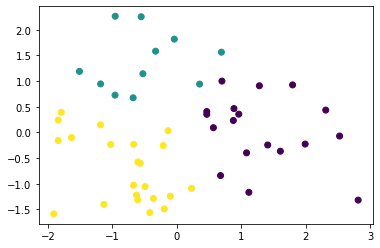

In [37]:
# Create a KMeans object with 3 clusters, use random_state=8
km = KMeans(n_clusters=3, random_state=8)

km.fit(features_scaled)

# Create a scatter plot of the first two principal components
# and color it according to the KMeans cluster assignment
plt.scatter(p_comps[:, 0], p_comps[:, 1], c=km.labels_)

# 10. Visualize the feature differences between the clusters

<AxesSubplot:xlabel='percent', ylabel='measurement'>

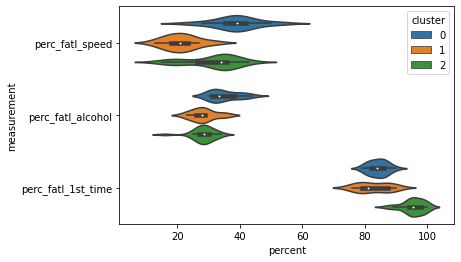

In [38]:
# Create a new column with the labels from the KMeans clustering
DF2['cluster'] = km.labels_

# Reshape the DataFrame to the long format
melt_car = pd.melt(DF2, id_vars='cluster', var_name='measurement', value_name='percent',
                   value_vars=['perc_fatl_speed', 'perc_fatl_alcohol', 'perc_fatl_1st_time'])

# Create a violin plot splitting and coloring the results according to the km-clusters
sns.violinplot(y='measurement', x='percent', data=melt_car, hue='cluster')

# 11. Compute the number of accidents within each cluste

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,million_miles_annually,state_encode,cluster,state,num_drvr_fatl_col
0,18.8,39,30,80,64914,0,0,Alabama,1220.3832
1,18.1,41,25,94,4593,1,2,Alaska,83.1333
2,18.6,35,28,96,59575,2,2,Arizona,1108.0950
3,22.4,18,26,95,32953,3,2,Arkansas,738.1472
4,12.0,35,28,89,320784,4,2,California,3849.4080


num_drvr_fatl_col                        
                    count        mean         sum
cluster                                          
0                      18  911.406439  16405.3159
1                      11  860.505945   9465.5654
2                      22  898.378595  19764.3291

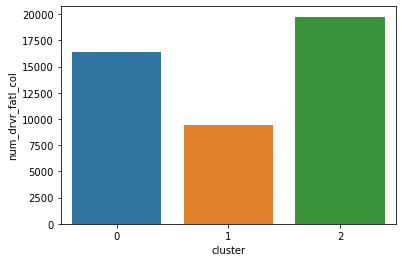

In [39]:
# Read in the new dataset
miles_driven = pd.read_csv('miles-driven.csv', sep='|')

# Merge the `DF2` DataFrame with the `miles_driven` DataFrame
car_acc_miles = DF2.merge(miles_driven)

# Create a new column for the number of drivers involved in fatal accidents
car_acc_miles['num_drvr_fatl_col'] = (car_acc_miles['drvr_fatl_col_bmiles']/1000)*car_acc_miles['million_miles_annually']
display(car_acc_miles.head())

# Create a barplot of the total number of accidents per cluster
sns.barplot(x="cluster", y="num_drvr_fatl_col", data=car_acc_miles, estimator=sum, ci=None)

# Calculate the number of states in each cluster and their 'num_drvr_fatl_col' mean and sum.
count_mean_sum = car_acc_miles.groupby('cluster')[['num_drvr_fatl_col']].agg(['count','mean','sum'])
count_mean_sum

# 12. Make a decision when there is no clear right choice

In [40]:
# Which cluster would you choose?
cluster_num = 0